# Homework 8

February 29, 2021

In [68]:
library(MASS)
library(pvclust)
library(dendextend)
library(circlize)

In [52]:
pics = read.csv('data_files//pic_sort_data.csv')
dis = 9 - pics[,2:17]
dim(pics)
pics

[1] 16 17

pic,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16
p1,9,0,7,0,3,0,0,0,0,3,5,1,0,0,1,1
p2,0,9,0,3,0,0,0,8,1,0,0,0,0,0,0,0
p3,7,0,9,0,2,0,0,0,0,1,1,0,0,0,1,1
p4,0,3,0,9,0,0,0,0,0,0,0,0,9,9,0,0
p5,3,0,2,0,9,0,0,0,0,2,2,0,0,0,0,0
p6,0,0,0,0,0,9,8,9,0,0,0,6,0,0,0,0
p7,0,0,0,0,0,8,9,0,1,0,0,0,0,0,0,0
p8,0,8,0,0,0,9,0,9,0,0,0,0,0,0,0,0
p9,0,1,0,0,0,0,1,0,9,0,0,0,0,0,0,0
p10,3,0,1,0,2,0,0,0,0,9,1,0,0,0,0,0


In [54]:
#convert to distances, both euclidean and raw dissimilarity
euc_dis = dist(pics[,2:17], method = "euclidean") # distance matrix
nat_dis = as.dist(dis)

In [58]:
# check out single dimensional Nonmetric MDS first
d1 =  isoMDS(euc_dis, k=1)
d1

initial  value 46.357072 
final  value 46.357072 
converged


6.95669594
-5.01848057
5.86713310
2.59202945
4.32086425
-12.16708315
-6.47128484
-10.50619382
-0.02920578
3.69844872
4.35775532


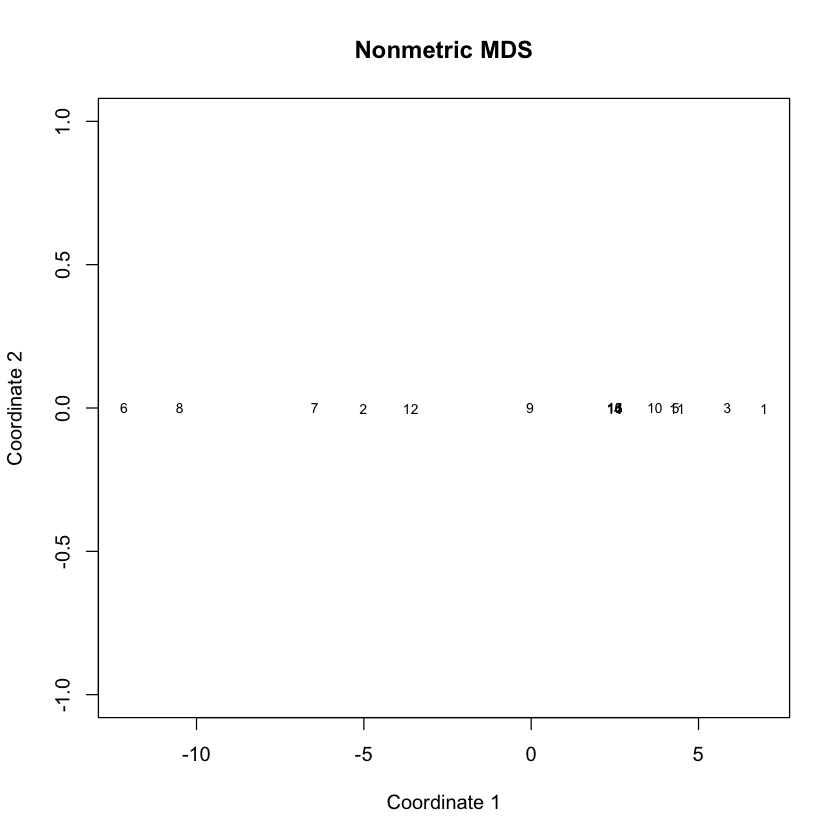

In [31]:
# plot
x = d1$points[,1]
y = rep(0,16)  
plot(x, y, xlab="Coordinate 1", ylab="Coordinate 2", main="Nonmetric MDS", type="n")
text(x, y, cex=.7)

Along this dimension there seem to be anywhere from 4 to 9 or 10 clusters, but it isn't obvious where the cutoffs should be. Let's look with 2 dimensions.

initial  value 13.853948 
final  value 13.853948 
converged


6.95669594,6.4678558
-5.01848057,-2.5861079
5.86713310,5.0868609
2.59202945,-13.2189571
4.32086425,3.5678242
-12.16708315,2.8212431
-6.47128484,1.9683392
-10.50619382,0.5299944
-0.02920578,0.1563417
3.69844872,2.9617335
4.35775532,4.0605153


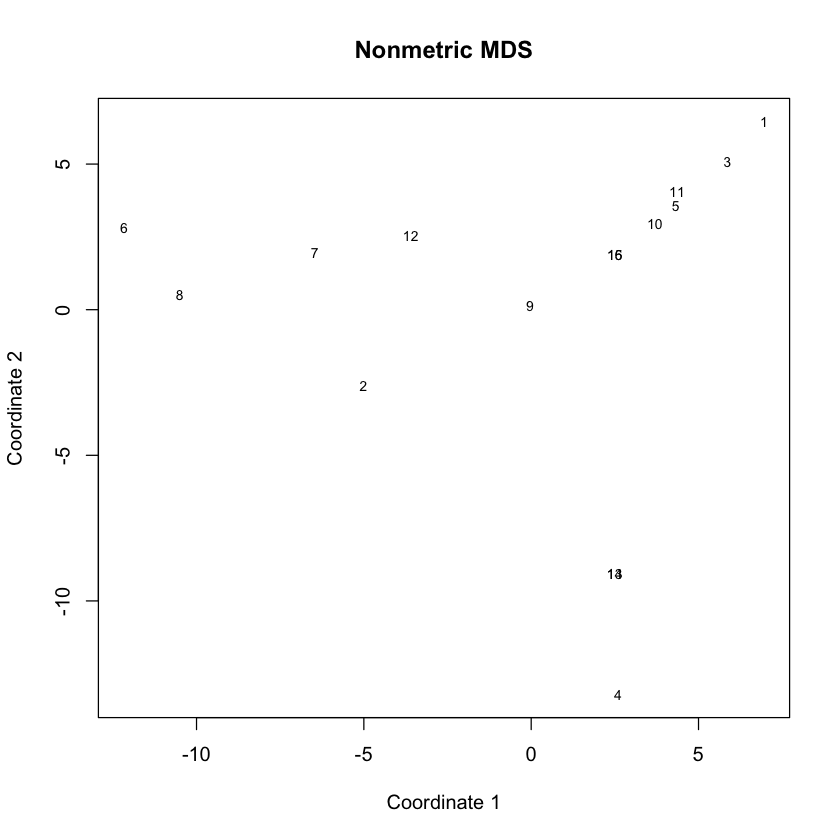

In [35]:
# check out single dimensional Nonmetric MDS first
d2 =  isoMDS(euc_dis, k=2)
d2

# plot
x = d2$points[,1]
y = d2$points[,2] 
plot(x, y, xlab="Coordinate 1", ylab="Coordinate 2", main="Nonmetric MDS", type="n")
text(x, y, cex=.7)

Things still aren't super clear here, but it looks like dimension 1 may correspond to some type of animacy continuum, where 6, 8, and 7 all have people in the images and have large negative values for coordinate 1. At the same time 1,3,5,10,and 11 are all images with water scenes, but no people. These are all larger positive values of dimension 1. Further, 4, 13, and 14 are images with non-human animals in them. 

It's harder to speculate on dimension 2, but it may have something to do with perspective. Images 4 and 13 for example show animals pretty up close and have large negative dimension 2 values, while 1, 3, and 11 show landscapes that go on into the distance. 

In [39]:
# check the stress needed to reduce to different numbers of dimensions
s = rep(0,15)
for (i in 1:15) {
  fit = isoMDS(euc_dis, k=i) # k is the number of dim  ---- let's see the two-dimensional solution
  fit # view results
  s[i] = fit$stress}

initial  value 46.357072 
final  value 46.357072 
converged
initial  value 13.853948 
final  value 13.853948 
converged
initial  value 10.675484 
final  value 10.675484 
converged
initial  value 9.399348 
final  value 9.399348 
converged
initial  value 7.115334 
final  value 7.115334 
converged
initial  value 6.950064 
final  value 6.950064 
converged
initial  value 5.406923 
iter   5 value 2.502097
iter  10 value 1.351921
iter  15 value 1.139657
iter  20 value 0.984747
iter  25 value 0.863365
iter  30 value 0.639663
iter  35 value 0.340763
iter  40 value 0.124797
iter  45 value 0.058010
iter  50 value 0.045863
final  value 0.045863 
stopped after 50 iterations
initial  value 3.738688 
iter   5 value 1.963017
iter  10 value 0.919149
iter  15 value 0.637069
iter  20 value 0.529795
iter  25 value 0.461260
iter  30 value 0.403952
iter  35 value 0.344628
iter  40 value 0.310442
iter  45 value 0.292320
iter  50 value 0.229548
final  value 0.229548 
stopped after 50 iterations
initial  value

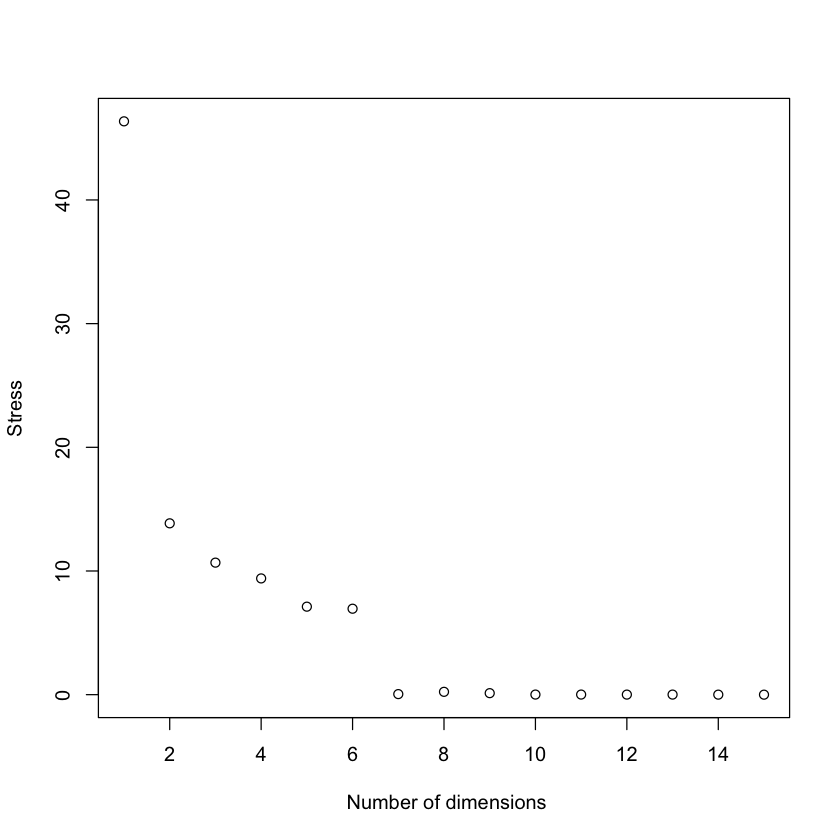

In [40]:
# plot the stress by the number of dimensions
plot(1:15,s,xlab = " Number of dimensions", ylab = "Stress")   # plot stress ~ # of dimensions 

From this plot it looks like anything after about 6 dimensions is the same amount of stress. So 6 or 7 dimensions will pretty accurately capture the data (although we can't visualize this in the typical MDS plots like above given the number of dimensions). 

initial  value 10.675484 
final  value 10.675484 
converged


6.95669594,6.4678558,-3.7966232
-5.01848057,-2.5861079,-4.8869014
5.86713310,5.0868609,-2.1968680
2.59202945,-13.2189571,-1.0993115
4.32086425,3.5678242,-2.7197780
-12.16708315,2.8212431,0.4406195
-6.47128484,1.9683392,3.0870026
-10.50619382,0.5299944,-4.3678535
-0.02920578,0.1563417,1.7523759
3.69844872,2.9617335,-1.9585727
4.35775532,4.0605153,-2.8348753


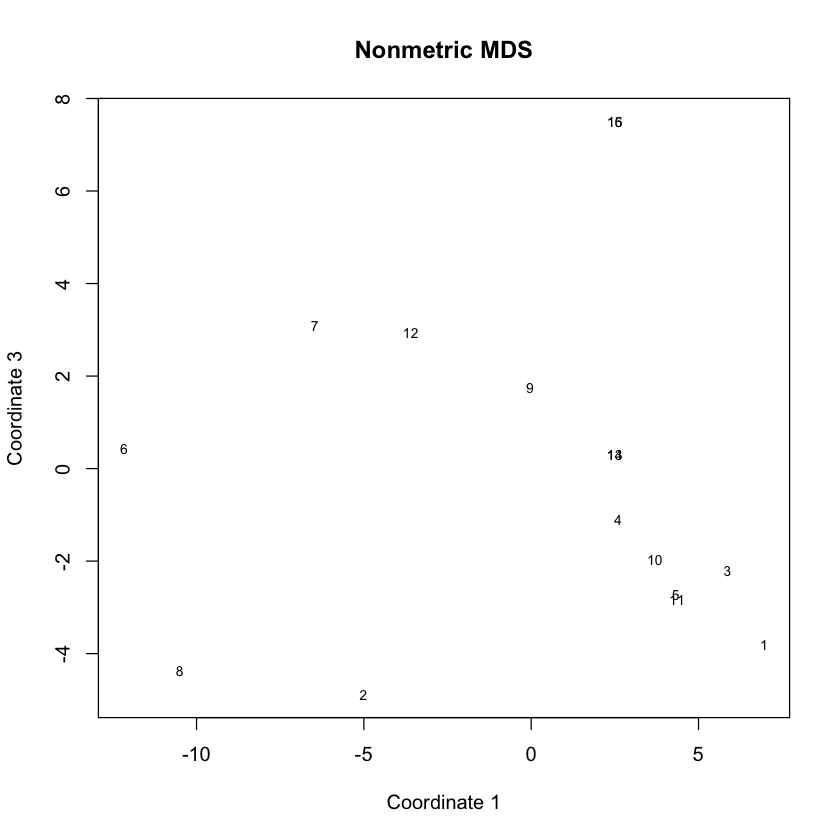

In [46]:
# check out single dimensional Nonmetric MDS first
d3 =  isoMDS(euc_dis, k=3)
d3

# plot
x = d3$points[,1]
y = d3$points[,3] 
plot(x, y, xlab="Coordinate 1", ylab="Coordinate 3", main="Nonmetric MDS", type="n")
text(x, y, cex=.7)

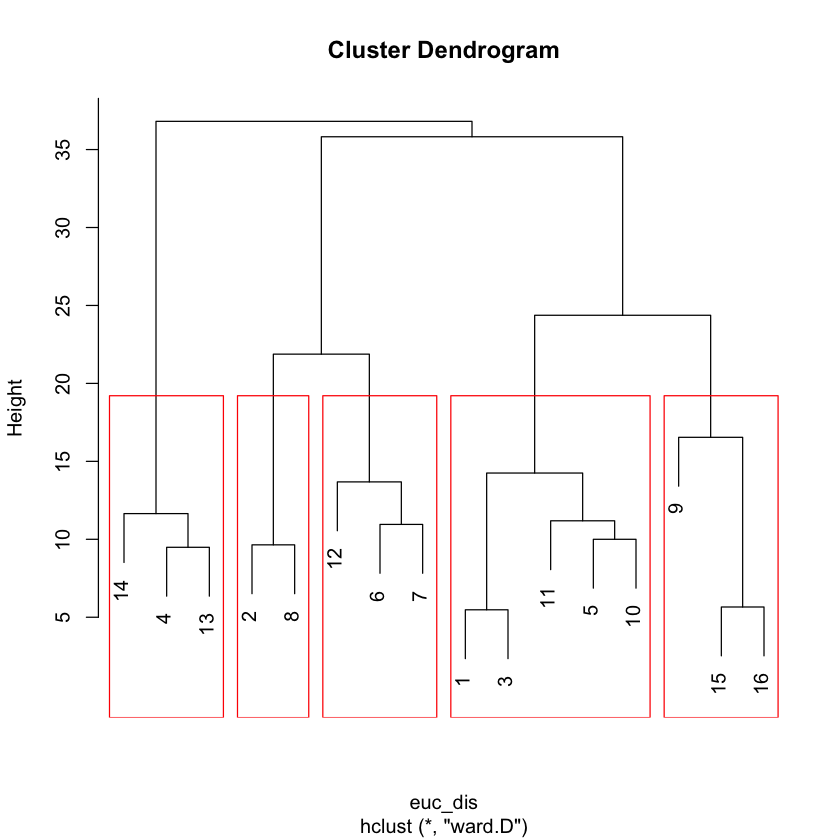

In [59]:
# Ward Hierarchical Clustering
fit = hclust(euc_dis, method="ward.D") 
plot(fit) # display dendogram
groups <- cutree(fit, k=3) # cut tree into 5 clusters
# draw dendogram with red borders around the 3 clusters 
rect.hclust(fit, k=5, border="red")

Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.56)... Done.
Bootstrap (r = 0.69)... Done.
Bootstrap (r = 0.75)... Done.
Bootstrap (r = 0.88)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.06)... Done.
Bootstrap (r = 1.19)... Done.
Bootstrap (r = 1.25)... Done.
Bootstrap (r = 1.38)... Done.


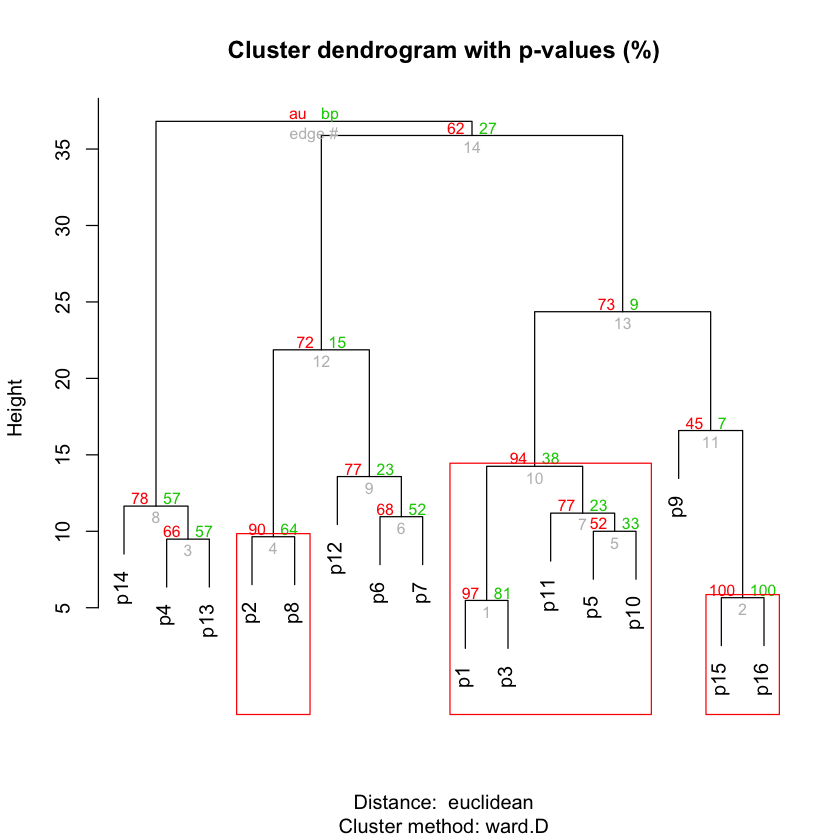

In [50]:
# Ward Hierarchical Clustering with Bootstrapped p values
fit <- pvclust(pics[,2:17], method.hclust="ward.D",
               method.dist="euclidean")
plot(fit) # dendogram with p values
# add rectangles around groups highly supported by the data
pvrect(fit, alpha=.90)

Loading required namespace: circlize


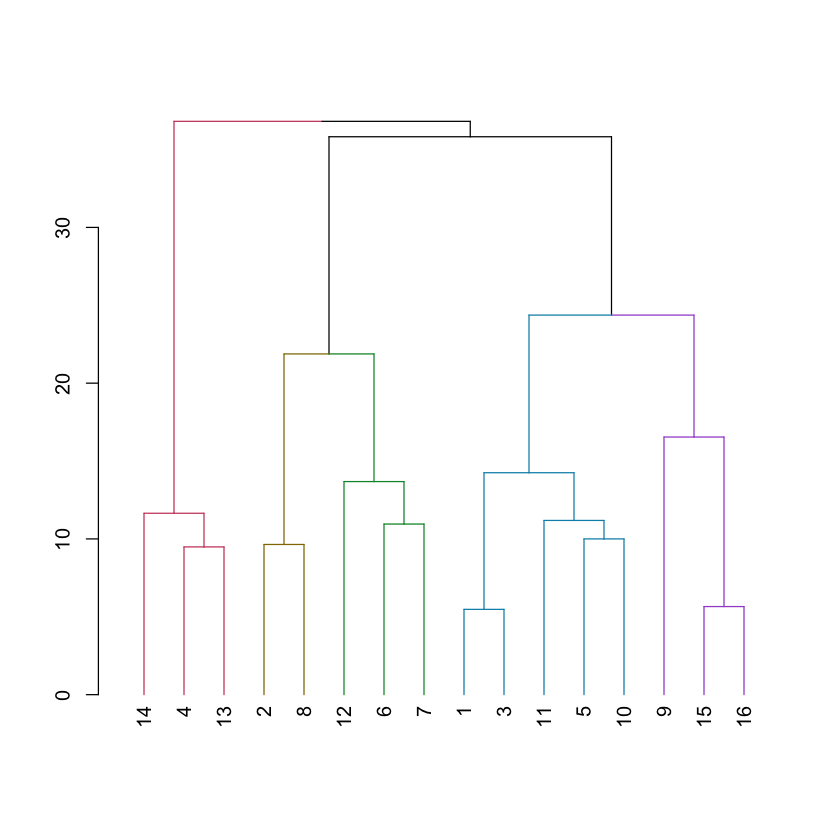

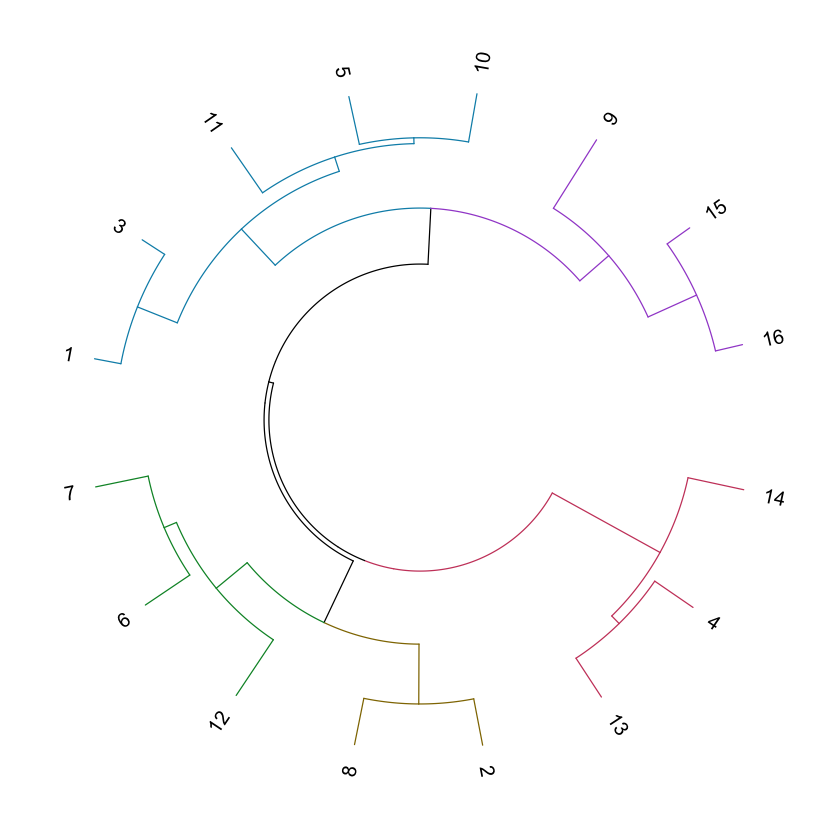

In [66]:
dend = as.dendrogram(fit)
dend = color_branches(dend, k=5) # identify 5 clusters as above
plot(dend)
# Requires that the circlize package will be installed
par(mar = rep(0,4))
circlize_dendrogram(dend)